### Meshes in 2D

In 2D we provide a mesh for rectangles, `StructuredRectangleMesh`:

In [11]:
from import_hack import *
from methodsnm.mesh_2d import *
from methodsnm.visualize import DrawMesh2D
m = StructuredRectangleMesh(2, 2)
print(m.faces, m.edges, m.points, m.faces2edges)
DrawMesh2D(m)

[[0 1 3]
 [3 4 6]
 [1 2 4]
 [4 5 7]
 [1 4 3]
 [4 7 6]
 [2 5 4]
 [5 8 7]] [[0 1]
 [1 2]
 [3 4]
 [4 5]
 [6 7]
 [7 8]
 [0 3]
 [3 6]
 [1 4]
 [4 7]
 [2 5]
 [5 8]
 [3 1]
 [6 4]
 [4 2]
 [7 5]] [[0.  0. ]
 [0.5 0. ]
 [1.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [1.  0.5]
 [0.  1. ]
 [0.5 1. ]
 [1.  1. ]] [[12  6  0]
 [14  7  2]
 [13  8  1]
 [15  9  3]
 [ 2 12  8]
 [ 4 14  9]
 [ 3 13 10]
 [ 5 15 11]]


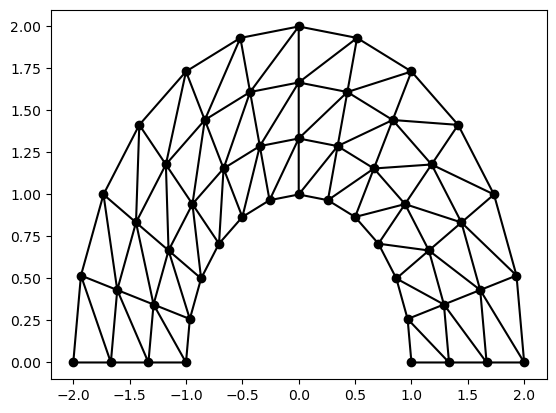

In [2]:
from numpy import sin, cos, pi
mc = StructuredRectangleMesh(12, 3, mapping= lambda x,y: (cos(pi*x)*(1+y), sin(pi*x)*(1+y)))
DrawMesh2D(mc)

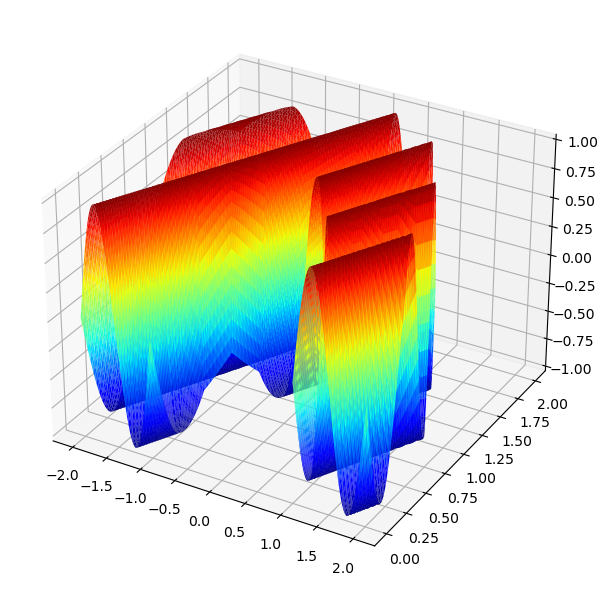

In [3]:
from methodsnm.visualize import DrawFunction2D
from methodsnm.meshfct import GlobalFunction
from numpy import sin, cos, pi
u = GlobalFunction(function=lambda x: sin(2*(x[0]-x[1])*pi), mesh=mc)
DrawFunction2D(u, sampling=10, contour=True, shrink_eps=0.08,figsize=(8,5))
DrawFunction2D(u, sampling=20, contour=False, figsize=(6,6))

### FEFunctions in 2D

#### Task `FES2D`-1

Implement the `P1_Triangle_Space` to make the following visualization of basis functions work:

[[0 1]
 [2 3]
 [0 2]
 [1 3]
 [2 1]] [[0. 0.]
 [1. 0.]
 [0. 1.]
 [1. 1.]]


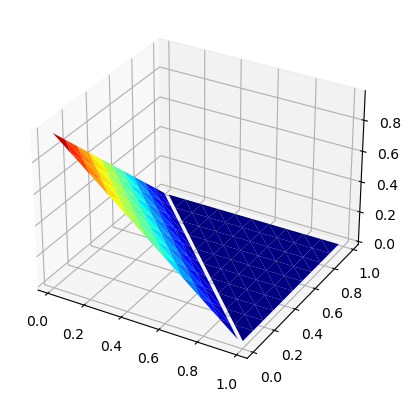

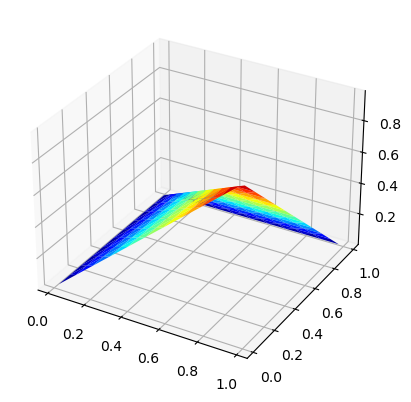

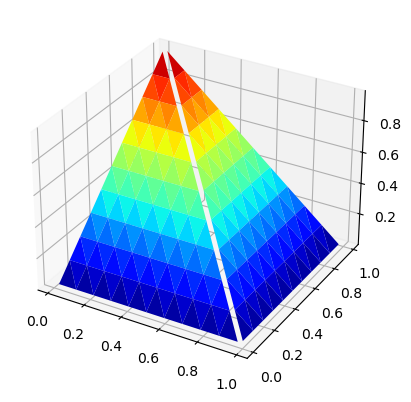

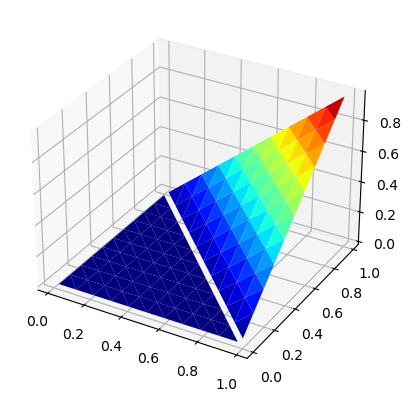

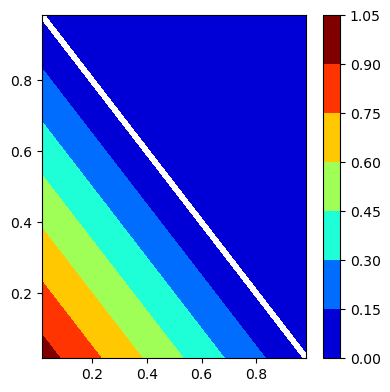

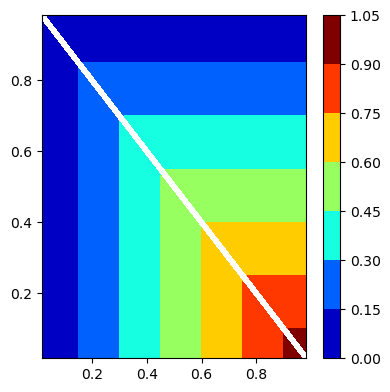

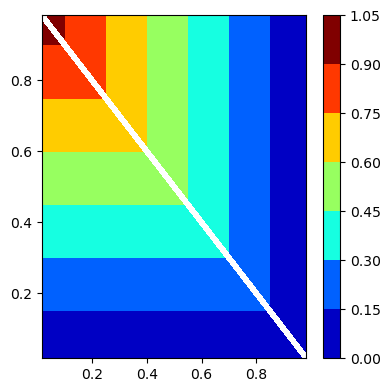

In [4]:
from methodsnm.fes import *
from methodsnm.meshfct import FEFunction
m = StructuredRectangleMesh(1, 1)
#DrawMesh2D(m)
print(m.edges, m.points)
fes = P1_Triangle_Space(m)
uh = FEFunction(fes)
for contour in [False, True]:
    for i in range(fes.ndof):
        uh.vector[:] = 0
        uh.vector[i] = 1
        DrawFunction2D(uh,shrink_eps=0.05, figsize=(4,4), contour=contour)   



#### Task `FES2D`-2

Implement the P2 of the Triangle FESpace (or implement a Triangle FESpace that takes the polynomial degree as argument).

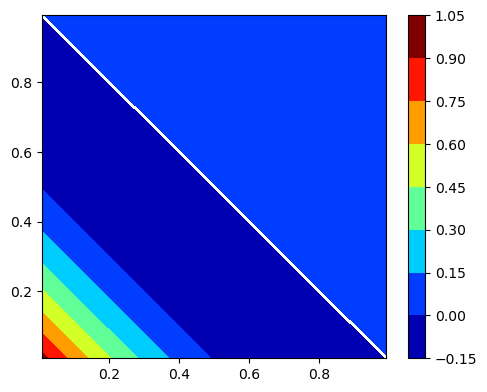

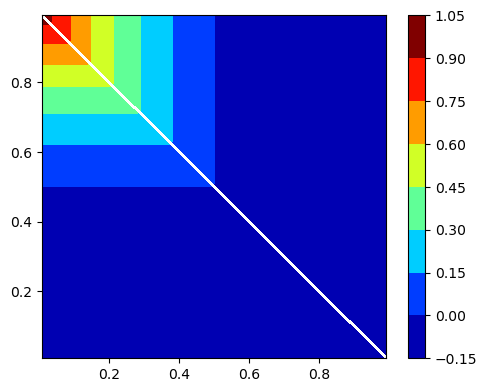

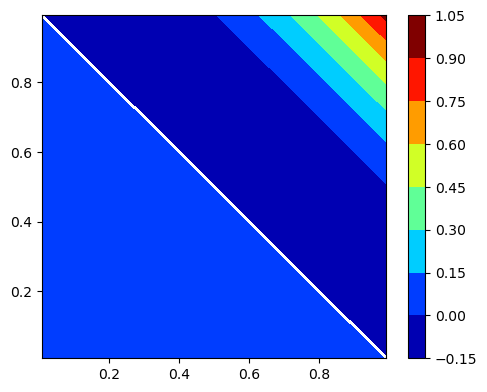

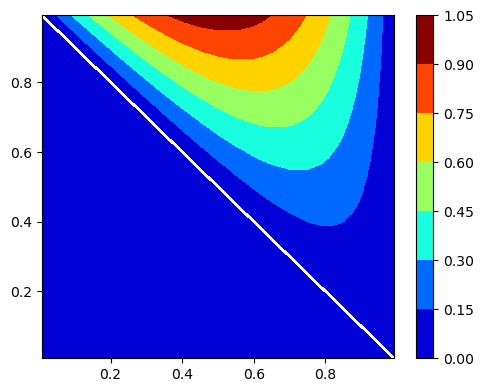

In [5]:
from methodsnm.fes import P2_Triangle_Space
from methodsnm.meshfct import FEFunction
m = StructuredRectangleMesh(1, 1)
fes = P2_Triangle_Space(m)
uh = FEFunction(fes)
for i in range(fes.ndof):
    uh.vector[:] = 0
    uh.vector[i] = 1
    DrawFunction2D(uh, sampling=20, shrink_eps=0.025, figsize=(5,4), contour=True)

#### Task `FES2D`-3

Extend the previous tasks to P3. 

In [6]:
from methodsnm.fes import P3_Triangle_Space
from methodsnm.meshfct import FEFunction
m = StructuredRectangleMesh(1, 1)
fes = P3_Triangle_Space(m)
uh = FEFunction(fes)
#for i in range(len(m.vertices),fes.ndof):
for i in range(0,fes.ndof):
    uh.vector[:] = 0
    uh.vector[i] = 1
    #DrawFunction2D(uh,sampling=25,shrink_eps=0.05)   
    DrawFunction2D(uh,sampling=25,shrink_eps=0.05,contour=True, figsize=(5,4))   

ImportError: cannot import name 'P3_Triangle_Space' from 'methodsnm.fes' (/home/jovyan/MOP/Wissenschaftliches Rechnen/HoloView/methodsnm/lectures/../src/methodsnm/fes.py)

#### Task `FES2D`-4 (optional)

Implement an FESpace based on the `P1Edge_Triangle_FE` where basis functions are associated to each edge.

In [ ]:
from methodsnm.fes import P1Edge_Triangle_Space
from methodsnm.meshfct import FEFunction
m = StructuredRectangleMesh(1, 1)
fes = P1Edge_Triangle_Space(m)
uh = FEFunction(fes)
for i in range(fes.ndof):
    uh.vector[:] = 0
    uh.vector[i] = 1
    DrawFunction2D(uh,shrink_eps=0.05)   

#### Task `FES2D-5` (optional)

Implement an additional function `interpolate` that takes another `MeshFunction` and interpolates the values based on the Lagrange interpolation:

$$
 u_h(x) = I_h(v) = \sum_{i=1}^{\texttt{ndof}} \Psi_i(v) \phi_i(x)
$$
where $\Psi_i$ are the functionals that are defined by the degrees of freedom. Note that global and local functionals have a correspondence through the finite element space. In the case of the Lagrange space, the functionals are point evaluations. 


#### Task `FES2D`-6 (optional)

Modify the finite elements to be able to use different orders on different elements.